In [4]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import math

***Calculate Ensemble Model Error Rates***

In [52]:
def ensemble_error_rate(n, err):
    
    # Define empty list
    ens_err = []

    # Calculate p
    p = 1-err

    # defining the list of r values
    r_values = list(range(n + 1))

    # list of pmf values
    dist = [binom.pmf(r, n, p) for r in r_values ]
    
    for i in range(n + 1):
        if i > n/2:
            ens_err.append(dist[i])
            
    # Print results
    print("Probability of Producing an Incorrect Prediction: ", (1-sum(ens_err)) * 100)           

***Ensemble 1:***

In [53]:
# Calculate the error rate for and ensemble that has 11 independent models with 0.2 error rates
ensemble_error_rate(11, 0.2)

Probability of Producing an Incorrect Prediction:  1.1654205439999399


***Ensemble 2:***

In [54]:
# Calculate the error rate for and ensemble that has 11 independent models with 0.49 error rates
ensemble_error_rate(11, 0.49)

Probability of Producing an Incorrect Prediction:  47.294772571497475


***Ensemble 3:***

In [55]:
# Calculate the error rate for and ensemble that has 21 independent models with 0.49 error rates
ensemble_error_rate(21, 0.49)

Probability of Producing an Incorrect Prediction:  46.30479010127362


***Just for Fun: Ways to Visualize the Probabilities***

***Method 1:***

In [41]:
# Print table with probabilities 

# Define values for n and p
n = 11
p = 0.51

# defining the list of r values
r_values = list(range(n + 1))

# obtaining the mean and variance 
mean, var = binom.stats(n, p)

# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
    
# printing mean, variance, and standard deviation
print('Mean=%.3f\nVariance=%.3f\nStd=%.3f'%(mean,var,math.sqrt(var)))

r	p(r)
0	0.0003909821048582986
1	0.004476346139296031
2	0.023295270724907946
3	0.07273829430430437
4	0.1514144085518173
5	0.22063242388979074
6	0.2296378289465168
7	0.1707220011118421
8	0.0888451230275913
9	0.030823818193245967
10	0.006416386644308338
11	0.0006071163615208261
Mean=5.610
Variance=2.749
Std=1.658


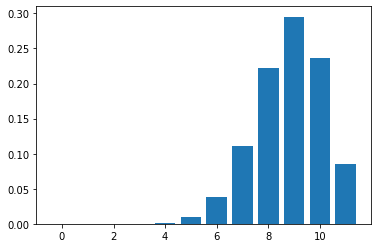

In [15]:
# Plot the probabilities
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

***Method 2:***

In [36]:
# Define values for n and p
n = 11
p = 0.8

# Calculate the first few moments
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=%.3f\nVariance=%.3f\nStd=%.3f'%(mean,var,math.sqrt(var)))

Mean=8.800
Variance=1.760
Std=1.327


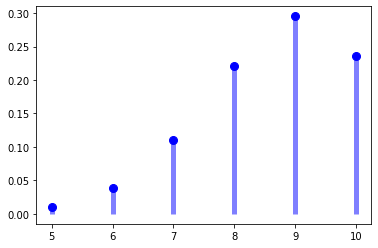

In [37]:
# Display the probability mass function
fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

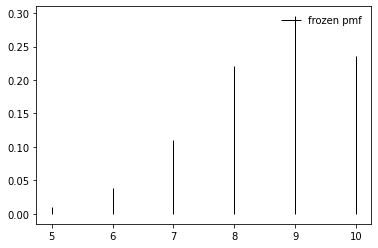

In [38]:
# Freeze the distribution and display the frozen pmf.
fig, ax = plt.subplots(1, 1)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [39]:
# Check accuracy of Cdf and Pdf
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

In [40]:
prob

array([0.01165421, 0.05040957, 0.1611392 , 0.38259845, 0.67787745,
       0.91410065])